In [1]:
!pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
data=pd.read_csv('health care diabetees.csv')
data.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(2768, 10)

In [4]:
data.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [6]:
data = data.drop(columns=["Id"])

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


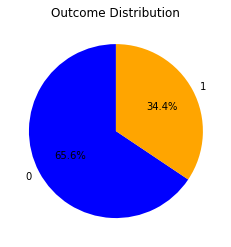

In [8]:
outcome_counts = data['Outcome'].value_counts()
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
plt.title('Outcome Distribution')
plt.show()

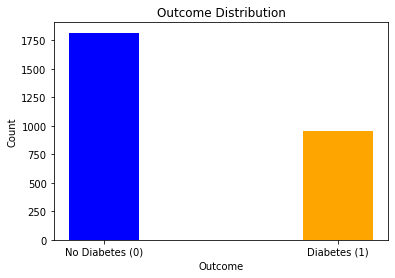

In [9]:
plt.bar(outcome_counts.index, outcome_counts, color=['blue', 'orange'], width=0.3)
plt.title('Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(outcome_counts.index, ['No Diabetes (0)', 'Diabetes (1)'])
plt.show()


In [10]:
data['BMI']=data['BMI'].replace([0],[data['BMI'].mean()])

In [11]:

print(data['Glucose'].mean())

print(data['BloodPressure'].mean())

print(data['SkinThickness'].mean())

print(data['Insulin'].mean())



121.10260115606937
69.13439306358381
20.82442196531792
80.1278901734104


In [12]:
# Finding the number of rows which has the null values

print('Glucose-',len(data['Glucose'][data['Glucose']==0]))

print('BloodPressure-',len(data['BloodPressure'][data['BloodPressure']==0]))

print('SkinThickness-',len(data['SkinThickness'][data['SkinThickness']==0]))

print('Insulin-',len(data['Insulin'][data['Insulin']==0]))

print('Pregnancies-', len(data['Pregnancies'][data['Pregnancies'] == 0]))

print('DiabetesPedigreeFunction-', len(data['DiabetesPedigreeFunction'][data['DiabetesPedigreeFunction'] == 0]))

print('Age-', len(data['Age'][data['Age'] == 0]))

Glucose- 18
BloodPressure- 125
SkinThickness- 800
Insulin- 1330
Pregnancies- 412
DiabetesPedigreeFunction- 0
Age- 0


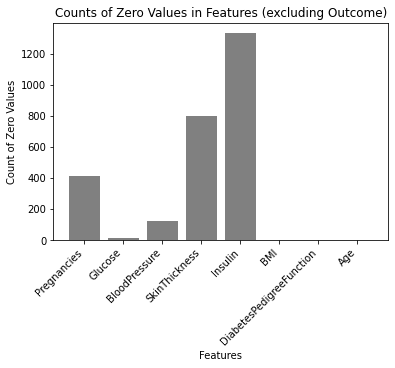

In [13]:
columns_to_check = [col for col in data.columns if col != 'Outcome']
zero_counts = []
for column in columns_to_check:
    zero_counts.append(len(data[column][data[column] == 0]))
colors = ['gray']
plt.bar(columns_to_check, zero_counts, color=colors)
plt.title('Counts of Zero Values in Features (excluding Outcome)')
plt.xlabel('Features')
plt.ylabel('Count of Zero Values')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [14]:
# Finding the null value percentage

selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin']

null_percentage = (data[selected_columns] == 0).mean() * 100

print("Percentage of Null Values for Each Column:")

print(null_percentage)

Percentage of Null Values for Each Column:
Glucose           0.650289
BloodPressure     4.515896
SkinThickness    28.901734
Insulin          48.049133
dtype: float64


In [15]:

data['Glucose']=data['Glucose'].replace([0],[data['Glucose'].mean()])

data['BloodPressure']=data['BloodPressure'].replace([0],[data['BloodPressure'].mean()])

data['SkinThickness']=data['SkinThickness'].replace([0],[data['SkinThickness'].mean()])

data['Insulin']=data['Insulin'].replace([0],[data['Insulin'].mean()])

In [16]:

null_percentage_treated = (data[selected_columns] == 0).mean() * 100
 
print("Percentage of Null Values for Each Column after the null value treatment:")

print(null_percentage_treated)

Percentage of Null Values for Each Column after the null value treatment:
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
dtype: float64


In [17]:
columns=data[selected_columns]


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

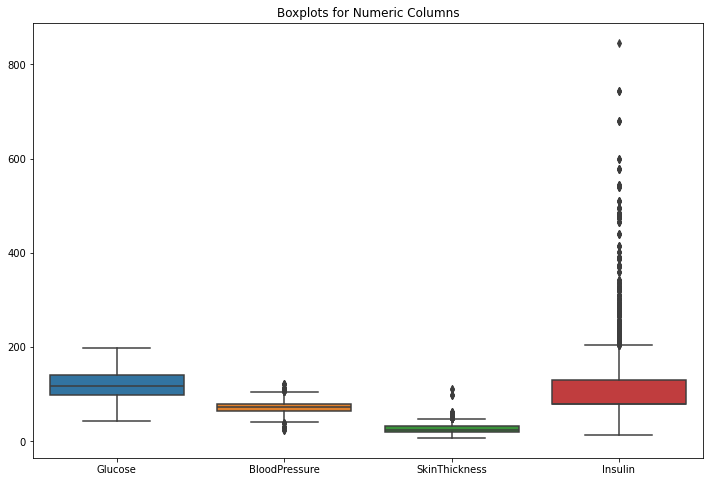

In [18]:
#visualize outliers
import seaborn as sns
plt.figure(figsize=(12, 8))

sns.boxplot(data=columns)

plt.title("Boxplots for Numeric Columns")

plt.show()

In [19]:
# Finding the Outlier Count in the selected Columns:
def find_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    count_outliers = len(outliers)
    return count_outliers
for column_name in selected_columns:
    outlier_count = find_outliers_iqr(data, column_name)
    print(f"Number of outliers in the '{column_name}' column: {outlier_count}")

Number of outliers in the 'Glucose' column: 0
Number of outliers in the 'BloodPressure' column: 49
Number of outliers in the 'SkinThickness' column: 58
Number of outliers in the 'Insulin' column: 304


In [20]:
sorted(data)
Q1=data.quantile(0.20)
Q3=data.quantile(0.80)
IQR=Q3-Q1
print(IQR)

Pregnancies                  6.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               14.175578
Insulin                     74.872110
BMI                         11.800000
DiabetesPedigreeFunction     0.466000
Age                         19.000000
Outcome                      1.000000
dtype: float64


In [21]:
data_cleared_iqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_cleared_iqr
print(data_cleared_iqr.shape)
print(data.shape)

(2488, 9)
(2768, 9)


In [22]:
col=data_cleared_iqr[['Glucose','BloodPressure','SkinThickness','Insulin']]

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

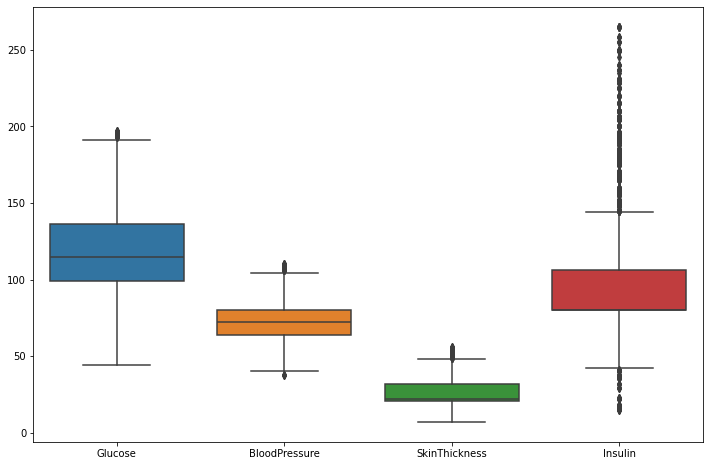

In [23]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=col)
plt.show()

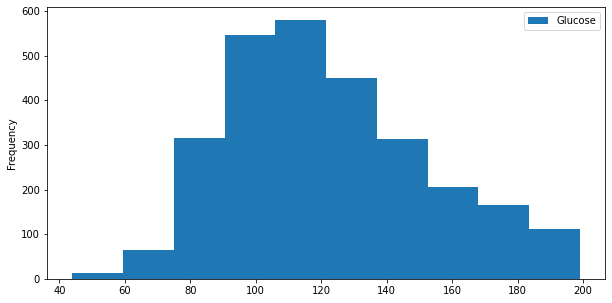

In [24]:
data['Glucose'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

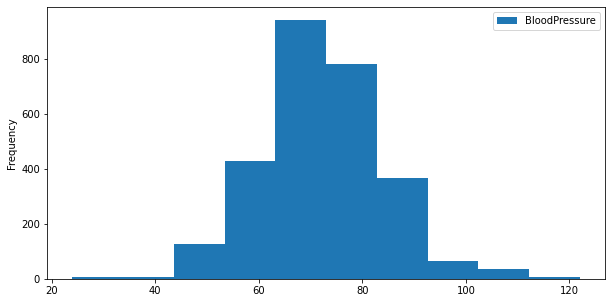

In [25]:
data['BloodPressure'].plot(kind='hist',figsize=(10,5))

plt.legend()

plt.show()

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

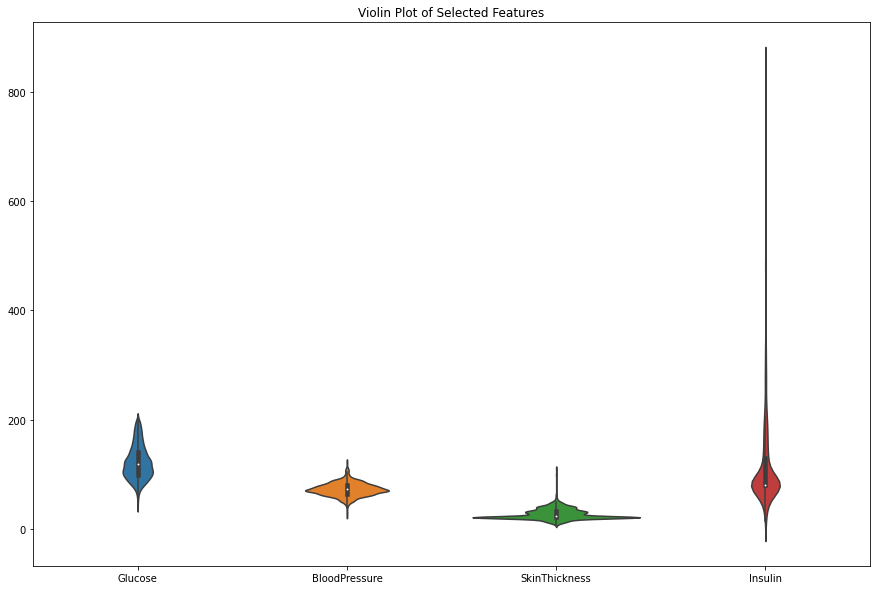

In [26]:
plt.figure(figsize=(15, 10))

sns.violinplot(data=data[selected_columns])

plt.title("Violin Plot of Selected Features")

plt.show()

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

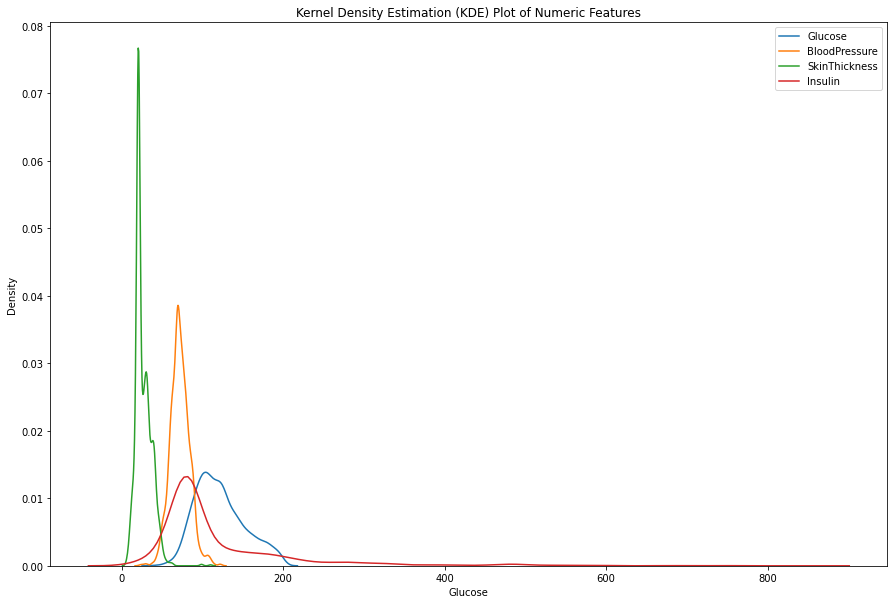

In [27]:
plt.figure(figsize=(15, 10))

for column in selected_columns:

    sns.kdeplot(data[column], label=column)

plt.title("Kernel Density Estimation (KDE) Plot of Numeric Features")

plt.legend()

plt.show()

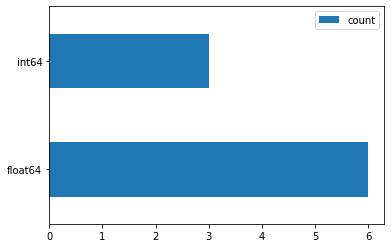

In [28]:
figsize=(16,2)

data.dtypes.value_counts().plot(kind='barh')

plt.legend()

plt.show()

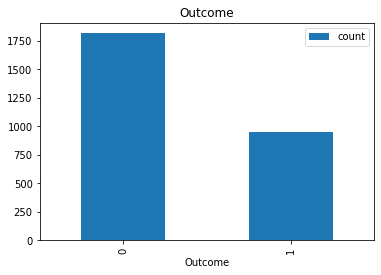

In [29]:
data['Outcome'].value_counts().plot(kind='bar')
plt.legend()
plt.title('Outcome')
plt.show()

In [30]:
outcome=(data['Outcome'].value_counts()/data['Outcome'].shape)*100
outcome

Outcome
0    65.606936
1    34.393064
Name: count, dtype: float64

In [30]:
balanced_data=100-outcome

balanced_data

Outcome
0    34.393064
1    65.606936
Name: count, dtype: float64

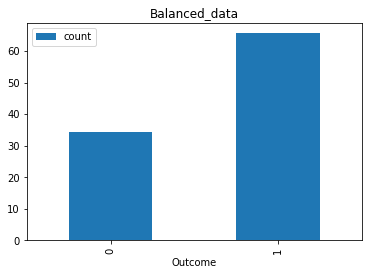

In [31]:
balanced_data.plot(kind='bar')

plt.legend()

plt.title('Balanced_data')
plt.show()

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

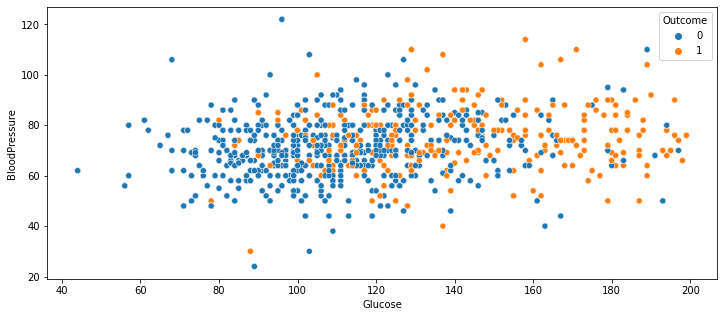

In [31]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)
plt.show()

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

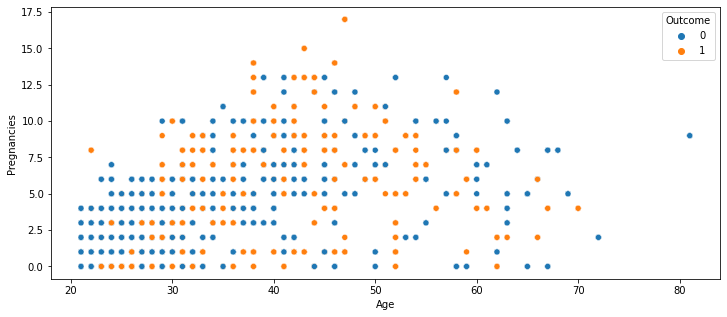

In [32]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Age',y='Pregnancies',hue='Outcome',data=data)
plt.show()

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

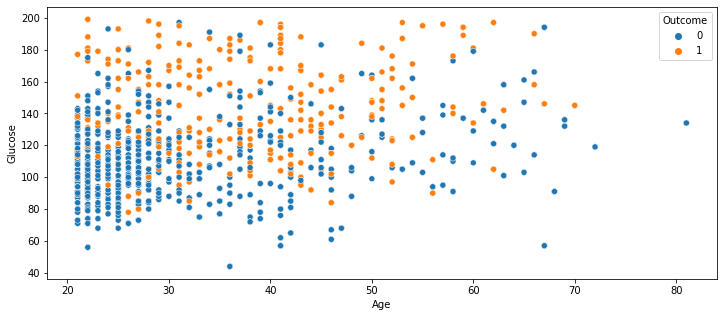

In [33]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Age',y='Glucose',hue='Outcome',data=data)
plt.show()

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

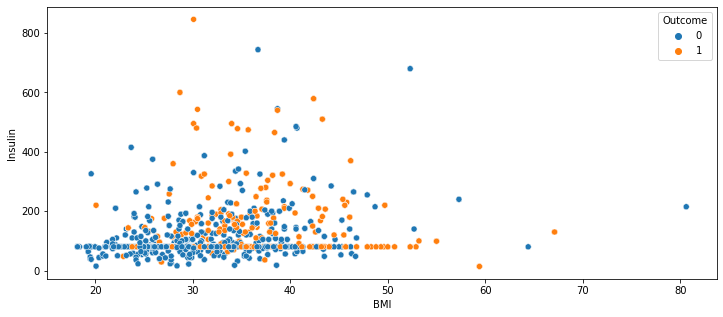

In [34]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='BMI',y='Insulin',hue='Outcome',data=data)
plt.show()

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

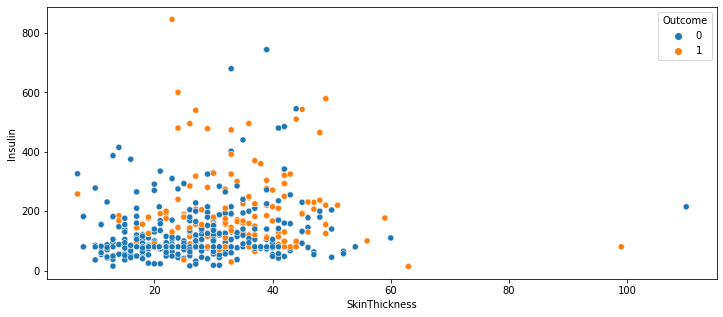

In [35]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='SkinThickness',y='Insulin',hue='Outcome',data=data)
plt.show()

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

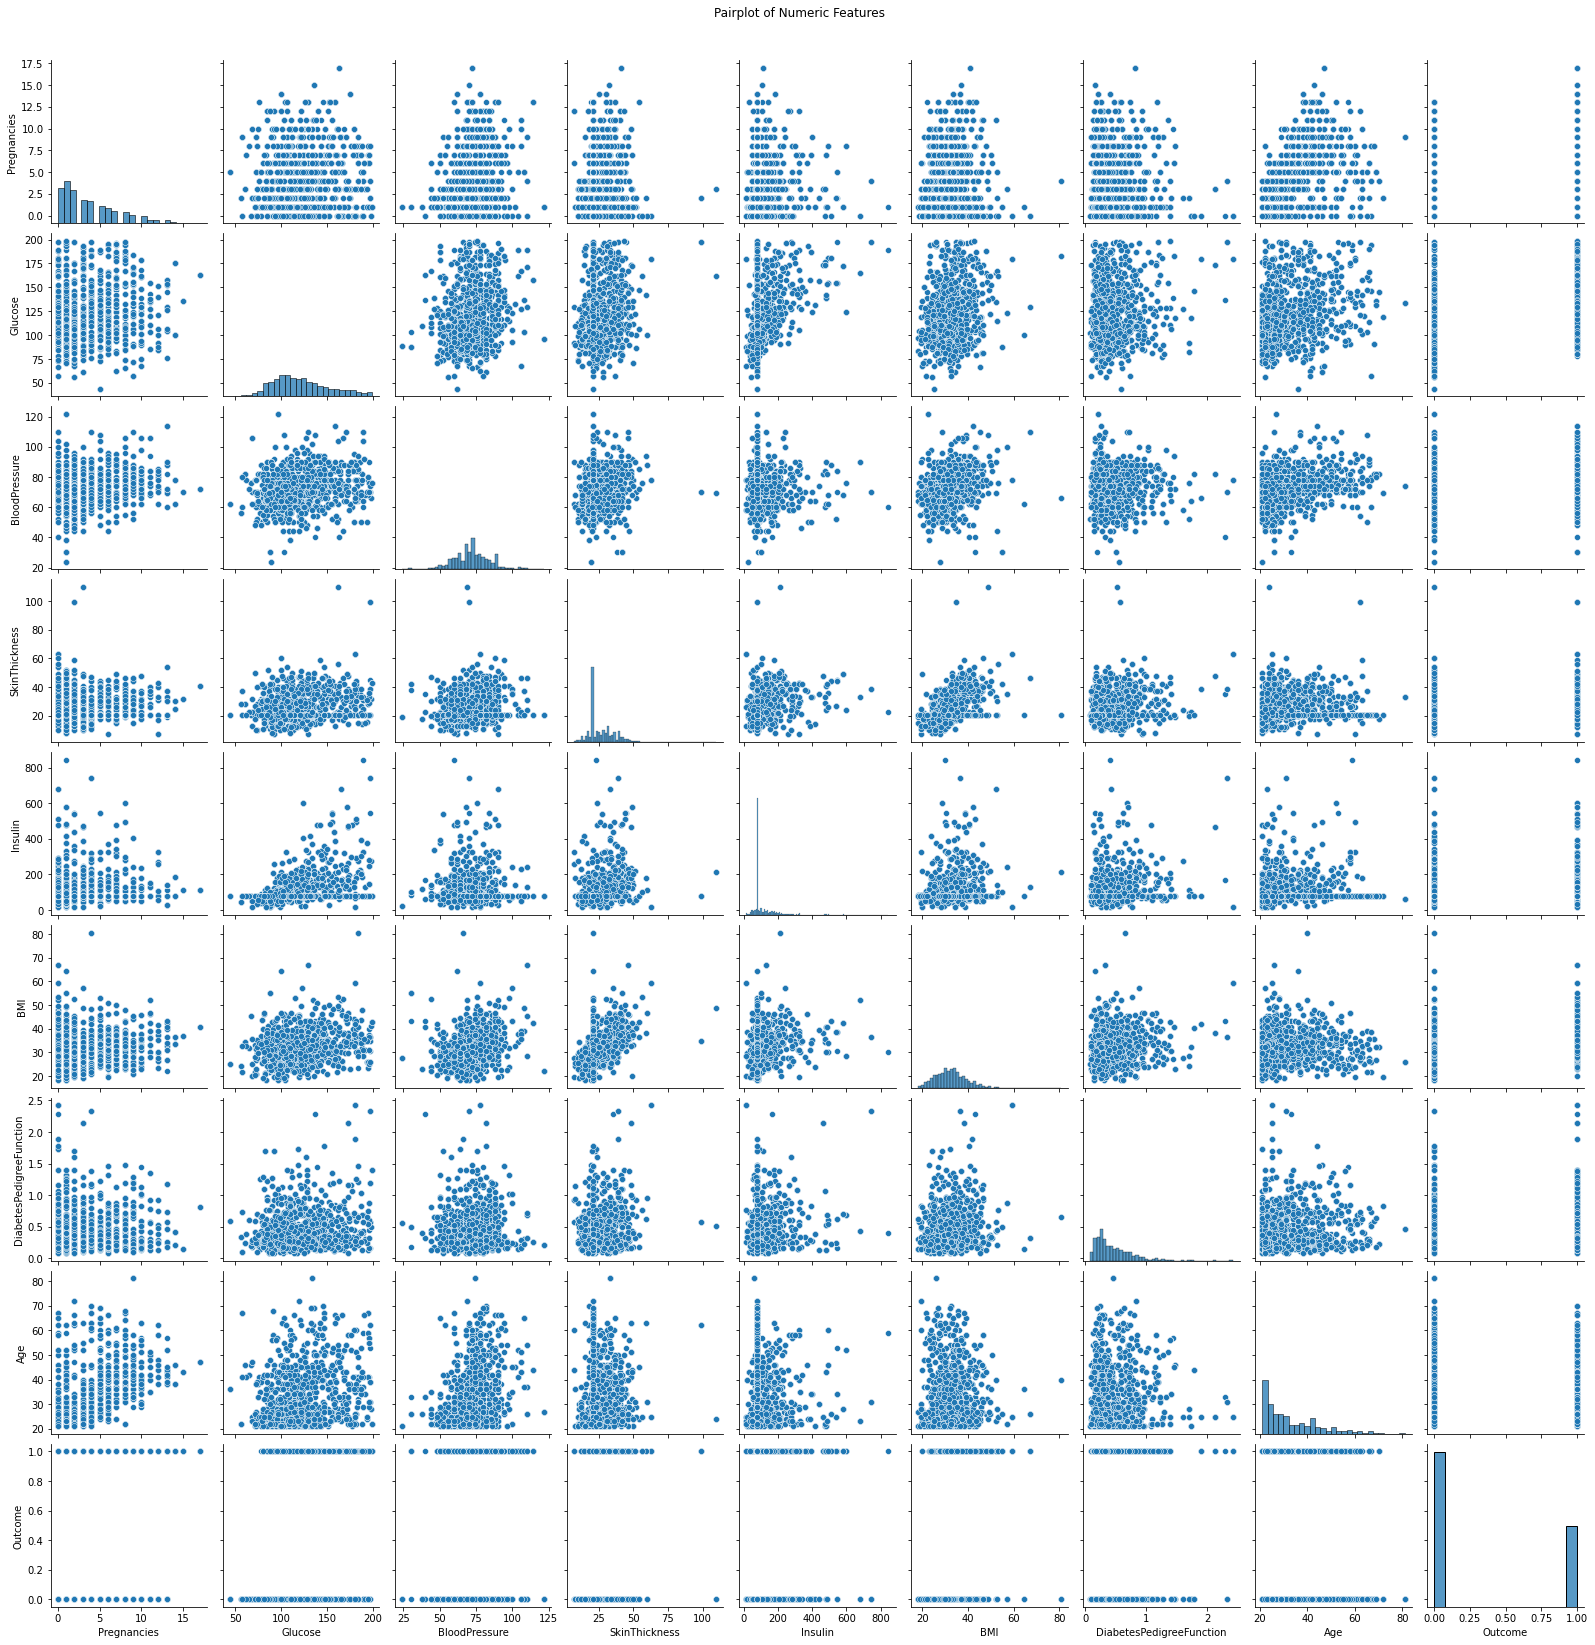

In [36]:
sns.pairplot(data)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

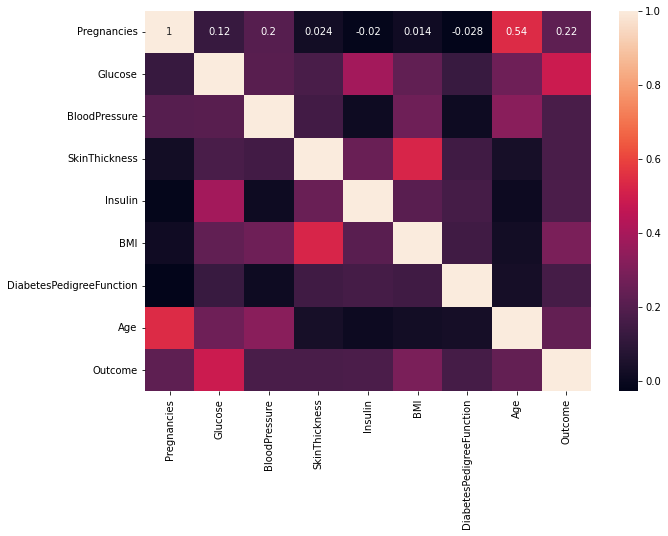

In [82]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,annot_kws={"size": 10})
plt.show()

In [48]:

x=data.drop(['Outcome'],axis=1)
y=data['Outcome']

In [49]:
data.corrwith(data['Outcome'])

Pregnancies                 0.223796
Glucose                     0.489299
BloodPressure               0.169353
SkinThickness               0.171925
Insulin                     0.173572
BMI                         0.290434
DiabetesPedigreeFunction    0.160664
Age                         0.237050
Outcome                     1.000000
dtype: float64

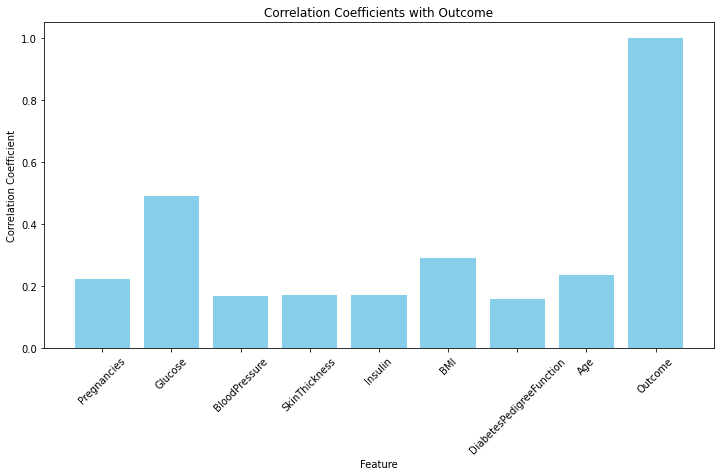

In [51]:
import matplotlib.pyplot as plt
correlation_with_outcome = data.corrwith(data['Outcome'])
plt.figure(figsize=(12, 6))
plt.bar(correlation_with_outcome.index, correlation_with_outcome.values, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients with Outcome')
plt.xticks(rotation=45)
plt.show()


                      Specs        Score
4                   Insulin  5651.788334
1                   Glucose  5056.121439
7                       Age   650.913895
0               Pregnancies   409.062359
5                       BMI   361.390520
3             SkinThickness   293.396667
2             BloodPressure   158.351589
6  DiabetesPedigreeFunction    16.076754


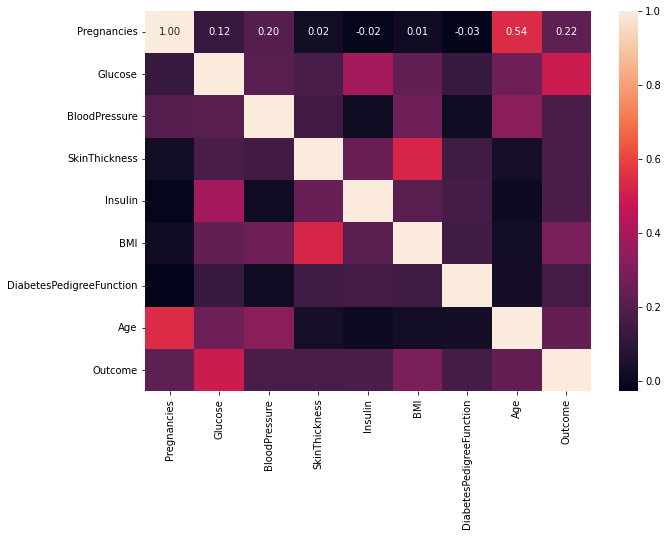

In [52]:
bestfeatures = SelectKBest(score_func=chi2, k='all')

fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)

dfcolumns = pd.DataFrame(x.columns) 

featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Specs','Score']  

print(featureScores.nlargest(8,'Score'))  

# Modelling

In [53]:
new_x=data.drop(['Outcome','BloodPressure'],axis=1).values
new_y=data.Outcome.values

In [54]:

trainx,testx,trainy,testy=train_test_split(new_x,new_y,test_size=0.20,random_state=10)

In [55]:
!pip install imblearn
print("Before OverSampling, counts of label '1': {}".format(sum(trainy == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(trainy == 0)))
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state =63)
trainx_res,trainy_res = sm.fit_resample(trainx,trainy.ravel())  
print('After OverSampling, the shape of train_X: {}'.format(trainx_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(trainy_res.shape))

 
print("After OverSampling, counts of label '1': {}".format(sum(trainy_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(trainy_res == 0)))


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Before OverSampling, counts of label '1': 771
Before OverSampling, counts of label '0': 1443 

After OverSampling, the shape of train_X: (2886, 7)
After OverSampling, the shape of train_y: (2886,) 

After OverSampling, counts of label '1': 1443
After OverSampling, counts of label '0': 1443


### Random Forest

Random Forest Accuracy: 0.99
Mean_squared_error  0.010830324909747292
***************************************************************

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       373
           1       0.97      0.99      0.98       181

    accuracy                           0.99       554
   macro avg       0.99      0.99      0.99       554
weighted avg       0.99      0.99      0.99       554

***************************************************************

Random Forest Confusion Matrix:
[[368   5]
 [  1 180]]


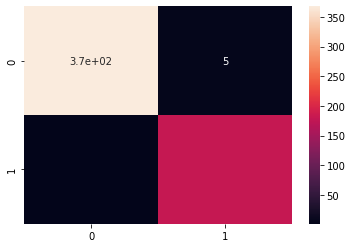

In [91]:
from sklearn import metrics
random_forest_model = RandomForestClassifier(random_state=42)

random_forest_model.fit(trainx_res, trainy_res)

y_pred_rf = random_forest_model.predict(testx)

accuracy_rf = accuracy_score(testy, y_pred_rf)

conf_matrix_rf = confusion_matrix(testy, y_pred_rf)
classification_rep_rf = classification_report(testy, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('Mean_squared_error ',mean_squared_error(testy,y_pred_rf))
print("***************************************************************")
print('\nRandom Forest Classification Report:')
print(classification_rep_rf)
print("***************************************************************")
print('\nRandom Forest Confusion Matrix:')
print(conf_matrix_rf)
sns.heatmap(metrics.confusion_matrix(testy, y_pred_rf),annot=True)
plt.show()




AUC: 1.000


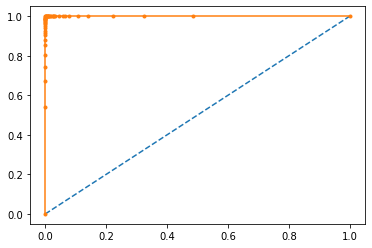

In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probs = random_forest_model.predict_proba(trainx_res)
probs = probs[:, 1]
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()


### Logistic regression

In [92]:
logreg=LogisticRegression(solver='liblinear',random_state=42)

logreg.fit(trainx_res,trainy_res)
prediction =logreg.predict(testx)

print('Accuracy_score -',accuracy_score(testy,prediction))

print('Mean_squared_error -',mean_squared_error(testy,prediction))
print("***************************************************************")
print("CLASSIFICATION REPORT:")
print(classification_report(testy,prediction))
print("***************************************************************")
print("CONFUSION MATRIX")
print((confusion_matrix(testy,prediction)))


Accuracy_score - 0.740072202166065
Mean_squared_error - 0.259927797833935
***************************************************************
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.86      0.74      0.79       373
           1       0.58      0.75      0.65       181

    accuracy                           0.74       554
   macro avg       0.72      0.74      0.72       554
weighted avg       0.77      0.74      0.75       554

***************************************************************
CONFUSION MATRIX
[[275  98]
 [ 46 135]]


AUC: 0.842


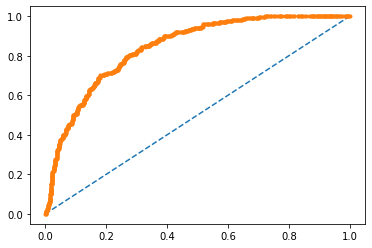

In [65]:

probs = logreg.predict_proba(trainx_res)
probs = probs[:, 1]
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### Decision Tree

In [66]:
dc=DecisionTreeClassifier(random_state=42)
dc.fit(trainx_res,trainy_res)
dc_pred=dc.predict(testx)
print('Accuracy_score -',accuracy_score(testy,dc_pred))
print('Mean_squared_error -',mean_squared_error(testy,dc_pred))
print("**********************************************************")
print("CLASSIFICATION REPORT")
print((classification_report(testy,dc_pred)))
print("**********************************************************")
print("CONFUSION MATRIX")
print((confusion_matrix(testy,dc_pred)))

Accuracy_score - 0.983754512635379
Mean_squared_error - 0.016245487364620937
**********************************************************
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       373
           1       0.96      0.99      0.98       181

    accuracy                           0.98       554
   macro avg       0.98      0.99      0.98       554
weighted avg       0.98      0.98      0.98       554

**********************************************************
CONFUSION MATRIX
[[365   8]
 [  1 180]]


AUC: 1.000


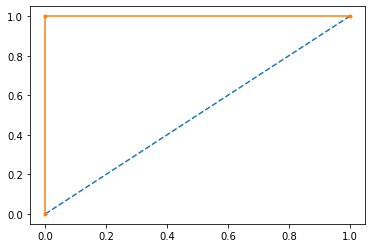

In [67]:
probs = dc.predict_proba(trainx_res)
probs = probs[:, 1]
auc = roc_auc_score(trainy_res, probs)

print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(trainy_res, probs)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')

plt.show()

### KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(trainx_res,trainy_res)
knn_pred=knn.predict(testx)

In [69]:
print('Accuracy_score -',accuracy_score(testy,knn_pred))
print('Mean_squared_error -',mean_squared_error(testy,knn_pred))
print("**************************************************")
print("CLASSIFICATION REPORT")
print((classification_report(testy,knn_pred)))
print("**************************************************")
print("CONFUSION MATRIX")
print((confusion_matrix(testy,knn_pred)))

Accuracy_score - 0.9259927797833934
Mean_squared_error - 0.0740072202166065
**************************************************
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       373
           1       0.86      0.92      0.89       181

    accuracy                           0.93       554
   macro avg       0.91      0.93      0.92       554
weighted avg       0.93      0.93      0.93       554

**************************************************
CONFUSION MATRIX
[[346  27]
 [ 14 167]]


AUC: 0.999


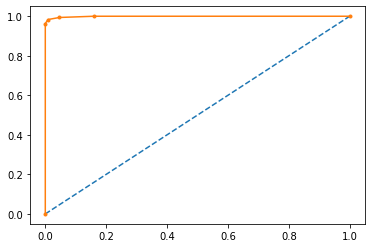

In [70]:
probs = knn.predict_proba(trainx_res)
probs = probs[:, 1]
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(trainy_res, probs)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### SVM

In [71]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42, probability=True)

svm_model.fit(trainx_res, trainy_res)
y_pred_svm = svm_model.predict(testx)

In [72]:
print('Accuracy_score -',accuracy_score(testy,y_pred_svm))
print('Mean_squared_error -',mean_squared_error(testy,y_pred_svm))
print("**************************************************")
print("CLASSIFICATION REPORT")
print((classification_report(testy,y_pred_svm)))
print("**************************************************")
print("CONFUSION MATRIX")
print((confusion_matrix(testy,y_pred_svm)))

Accuracy_score - 0.7472924187725631
Mean_squared_error - 0.2527075812274368
**************************************************
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.86      0.74      0.80       373
           1       0.59      0.76      0.66       181

    accuracy                           0.75       554
   macro avg       0.73      0.75      0.73       554
weighted avg       0.77      0.75      0.75       554

**************************************************
CONFUSION MATRIX
[[277  96]
 [ 44 137]]


AUC: 0.842


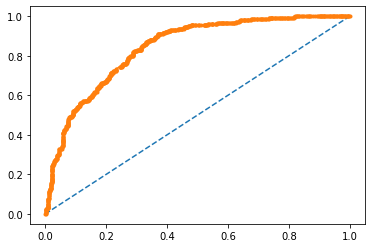

In [73]:
probs = svm_model.predict_proba(trainx_res)
probs = probs[:, 1]
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(trainy_res, probs)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [74]:
Algorithms=['KNN','RandomForest','Decisiontree','logreg', 'SVM']
Accuracy_Score=[accuracy_score(testy,knn_pred),accuracy_score(testy,y_pred_rf),accuracy_score(testy,dc_pred),accuracy_score(testy,prediction), accuracy_score(testy,y_pred_svm)]
accuracy_df = pd.DataFrame({'Algorithm': Algorithms, 'Accuracy': Accuracy_Score})
print("test accuracy - ")
print(accuracy_df)

test accuracy - 
      Algorithm  Accuracy
0           KNN  0.925993
1  RandomForest  0.989170
2  Decisiontree  0.983755
3        logreg  0.740072
4           SVM  0.747292


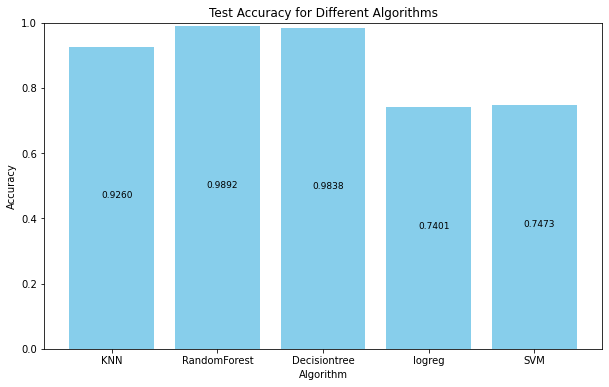

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracy_df['Algorithm'], accuracy_df['Accuracy'], color='skyblue')
plt.title('Test Accuracy for Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
for bar, value in zip(bars, accuracy_df['Accuracy']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() / 2, f'{value:.4f}', fontsize=9)

plt.show()


In [76]:
Algorithms=['KNN','RandomForest','Decisiontree','logreg', 'SVM']
Accuracy_Score=[knn.score(trainx_res,trainy_res), random_forest_model.score(trainx_res, trainy_res), dc.score(trainx_res,trainy_res), logreg.score(trainx_res,trainy_res), svm_model.score(trainx_res,trainy_res)]
accuracy_df = pd.DataFrame({'Algorithm': Algorithms, 'Accuracy': Accuracy_Score})
print("train accuracy - ")
print(accuracy_df)

train accuracy - 
      Algorithm  Accuracy
0           KNN  0.987179
1  RandomForest  1.000000
2  Decisiontree  1.000000
3        logreg  0.747748
4           SVM  0.745322


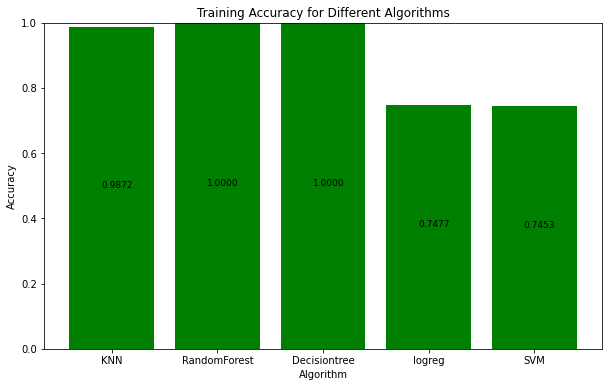

In [77]:
import matplotlib.pyplot as plt

# Assuming you already have the 'accuracy_df' DataFrame

# Plotting the training accuracy with values in the center of each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracy_df['Algorithm'], accuracy_df['Accuracy'], color='green')
plt.title('Training Accuracy for Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to show percentages

# Adding values in the center of the bars
for bar, value in zip(bars, accuracy_df['Accuracy']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() / 2, f'{value:.4f}', fontsize=9)

plt.show()


In [79]:
import joblib

joblib.dump(random_forest_model, 'trained_model1.joblib')

['trained_model1.joblib']

In [81]:
import tkinter as tk
from tkinter import ttk
import numpy as np

class YourApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Diabetes Prediction")
        self.model = joblib.load('trained_model1.joblib')
        self.create_widgets()

    def create_widgets(self):
        self.pregnancies_entry = ttk.Entry(self.root, width=15)
        self.glucose_entry = ttk.Entry(self.root, width=15)
        self.blood_pressure_entry = ttk.Entry(self.root, width=15)
        self.skin_thickness_entry = ttk.Entry(self.root, width=15)
        self.insulin_entry = ttk.Entry(self.root, width=15)
        self.bmi_entry = ttk.Entry(self.root, width=15)
        self.diabetes_pedigree_entry = ttk.Entry(self.root, width=15)
        self.age_entry = ttk.Entry(self.root, width=15)

        
        ttk.Label(self.root, text="Pregnancies:").grid(row=0, column=0, padx=5, pady=5)
        ttk.Label(self.root, text="Glucose:").grid(row=1, column=0, padx=5, pady=5)
        ttk.Label(self.root, text="Blood Pressure:").grid(row=2, column=0, padx=5, pady=5)
        ttk.Label(self.root, text="Skin Thickness:").grid(row=3, column=0, padx=5, pady=5)
        ttk.Label(self.root, text="Insulin:").grid(row=4, column=0, padx=5, pady=5)
        ttk.Label(self.root, text="BMI:").grid(row=5, column=0, padx=5, pady=5)
        ttk.Label(self.root, text="Diabetes Pedigree:").grid(row=6, column=0, padx=5, pady=5)
        ttk.Label(self.root, text="Age:").grid(row=7, column=0, padx=5, pady=5)

     
        self.pregnancies_entry.grid(row=0, column=1, padx=5, pady=5)
        self.glucose_entry.grid(row=1, column=1, padx=5, pady=5)
        self.blood_pressure_entry.grid(row=2, column=1, padx=5, pady=5)
        self.skin_thickness_entry.grid(row=3, column=1, padx=5, pady=5)
        self.insulin_entry.grid(row=4, column=1, padx=5, pady=5)
        self.bmi_entry.grid(row=5, column=1, padx=5, pady=5)
        self.diabetes_pedigree_entry.grid(row=6, column=1, padx=5, pady=5)
        self.age_entry.grid(row=7, column=1, padx=5, pady=5)

       
        predict_button = ttk.Button(self.root, text="Predict", command=self.predict_diabetes)
        predict_button.grid(row=8, column=1, pady=10)

        
        self.result_label = ttk.Label(self.root, text="Predicted Outcome: ")
        self.result_label.grid(row=9, column=1, pady=10)

    def predict_diabetes(self):
        
        pregnancies = float(self.pregnancies_entry.get())
        glucose = float(self.glucose_entry.get())
        blood_pressure = float(self.blood_pressure_entry.get())
        skin_thickness = float(self.skin_thickness_entry.get())
        insulin = float(self.insulin_entry.get())
        bmi = float(self.bmi_entry.get())
        diabetes_pedigree = float(self.diabetes_pedigree_entry.get())
        age = float(self.age_entry.get())

        input_features = np.array([[pregnancies, glucose, skin_thickness, insulin, bmi, diabetes_pedigree, age]])
        prediction = self.model.predict(input_features)
        print("Prediction:", prediction)
        if prediction[0] == 0:
            result_text = "No Diabetes"
        else:
            result_text = "Diabetes"

        self.result_label.config(text=f"Predicted Outcome: {result_text}")

if __name__ == "__main__":
    root = tk.Tk()
    app = YourApp(root)
    root.mainloop()


Prediction: [1]
Prediction: [0]
